# Chapter: Best Practices

# Topic: Holdout Method

In [2]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [3]:
# create pipeline for quadratic fit via linear model 
# import relevant classes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# add transformers and estimators sequentially as list of tuples
# the names ‘poly’, ‘scaler’, ‘model’ can be used to access the individual elements of pipeline later 
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [4]:
# separate training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('Number of samples in training set: ', x_train.shape[0])
print('Number of samples in test set: ', x_test.shape[0])

Number of samples in training set:  20
Number of samples in test set:  5


In [5]:
# fit pipeline and predict
pipe.fit(x_train, y_train)
y_predicted_train = pipe.predict(x_train)
y_predicted_test = pipe.predict(x_test)

In [6]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('Training metric (mse) = ', mse(y_train, y_predicted_train))
print('Test metric (mse) = ', mse(y_test, y_predicted_test))

Training metric (mse) =  3.7890806998433058
Test metric (mse) =  3.555863654377994


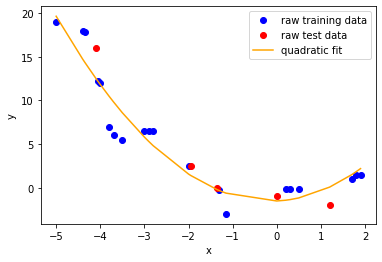

In [7]:
# plot predictions
y_predicted = pipe.predict(x)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted, color='orange', label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()